# Predict Restaurant Customer Satisfaction


## Introduction
Customer satisfaction is a critical metric in the restaurant industry, influencing customer loyalty, word-of-mouth referrals, and overall business success. This dataset provides comprehensive information on customer visits to restaurants, including demographic details, visit-specific metrics, and customer satisfaction ratings 

The objective of this analysis is to build a predictive model that identifies the factors contributing to high customer satisfaction. By understanding these factors, restaurants can improve their services, tailor marketing strategies, and ultimately enhance customer experiences.


In [427]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

In [387]:
# load csv file
df = pd.read_csv('restaurant_customer_satisfaction.csv')

In [388]:
# show first 5 rows of the data
df.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [389]:
# check shape of the dataset
df.shape

(1500, 19)

In [390]:
# check types
df.dtypes

CustomerID                int64
Age                       int64
Gender                   object
Income                    int64
VisitFrequency           object
AverageSpend            float64
PreferredCuisine         object
TimeOfVisit              object
GroupSize                 int64
DiningOccasion           object
MealType                 object
OnlineReservation         int64
DeliveryOrder             int64
LoyaltyProgramMember      int64
WaitTime                float64
ServiceRating             int64
FoodRating                int64
AmbianceRating            int64
HighSatisfaction          int64
dtype: object

In [391]:
# check for duplicated values
df.duplicated().sum()

0

In [392]:
# check for missing values
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [393]:
df.describe()

,CustomerID,Age,Income,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1403.500000,43.832000,85921.890000,105.659004,5.035333,0.296667,0.405333,0.480000,30.163550,3.044000,2.997333,2.987333,0.134000
std,433.157015,14.967157,38183.051749,52.381849,2.558864,0.456941,0.491120,0.499766,17.214184,1.423405,1.418920,1.450716,0.340766
min,654.000000,18.000000,20012.000000,10.306127,1.000000,0.000000,0.000000,0.000000,0.001380,1.000000,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,52444.000000,62.287907,3.000000,0.000000,0.000000,0.000000,15.235423,2.000000,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,85811.000000,104.626408,5.000000,0.000000,0.000000,0.000000,30.044055,3.000000,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,119159.250000,148.649330,7.000000,1.000000,1.000000,1.000000,45.285649,4.000000,4.000000,4.000000,0.000000
max,2153.000000,69.000000,149875.000000,199.973527,9.000000,1.000000,1.000000,1.000000,59.970762,5.000000,5.000000,5.000000,1.000000


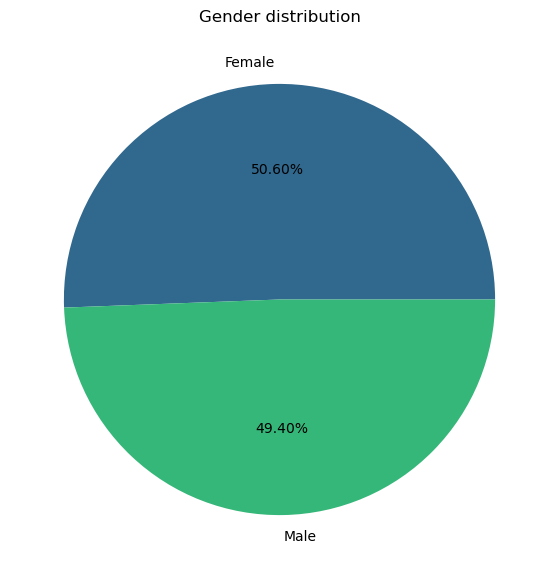

In [394]:
# visualize gender
df_by_gender = df['Gender'].value_counts().reset_index()
df_by_gender.columns = ['Gender', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_gender['Count'], labels=df_by_gender['Gender'], autopct='%1.2f%%', colors=sns.color_palette('viridis', n_colors=2))
plt.title('Gender distribution')
plt.show()

- the percentage of female visting the restaurant are higher than the percentage of male.

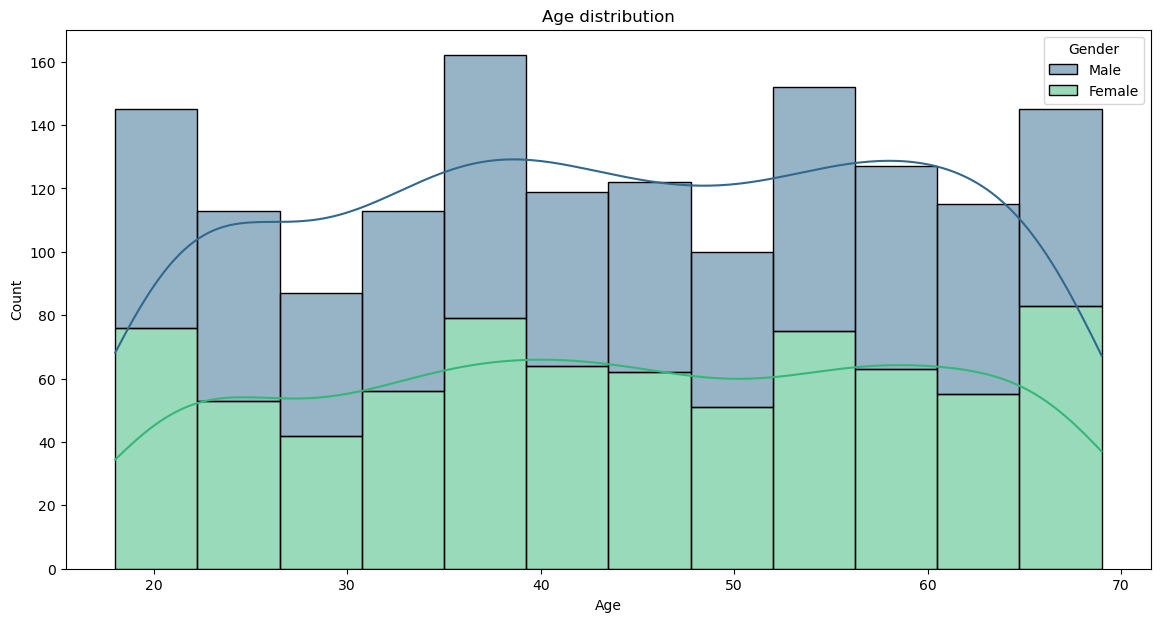

In [395]:
# visualize age
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', kde=True, palette='viridis')
plt.title('Age distribution')
plt.show()

- Women between the ages of 52 and 68 show the highest likelihood of visiting the restaurant possibly due to retirement.
- Additionally, women in their mid-30s to 40s, teenagers, and men in similar age groups also frequent the restaurant.
- The age range in the late 20s has the fewest visitors, possibly due to commitments such as studies and work.

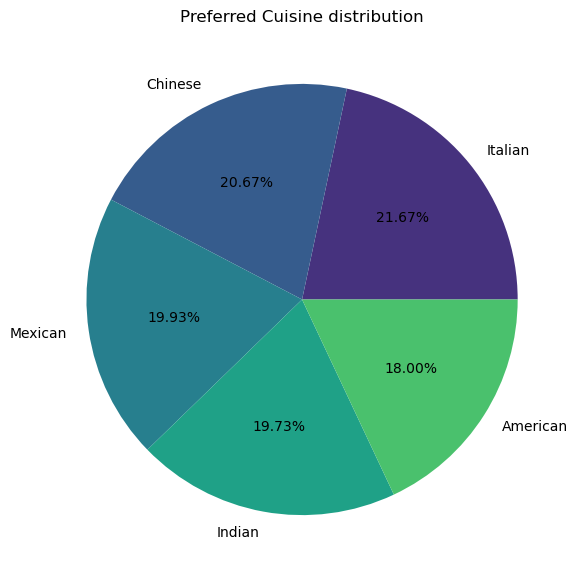

In [396]:
# visualize preferred cuisine
df_by_cuis = df['PreferredCuisine'].value_counts().reset_index()
df_by_cuis.columns = ['PreferredCuisine', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_cuis['Count'], labels=df_by_cuis['PreferredCuisine'], autopct='%1.2f%%', colors=sns.color_palette('viridis'))
plt.title('Preferred Cuisine distribution')
plt.show()

- Italian food ranks 1st with a percentage of 21.67%.
- Chinese food ranks 2nd with a percentage of 20.67%.
- Mexican food ranks 3rd with a percentage of 19.93%.
- Indian food ranks 4th with a percentage of 19.73%.
- American food ranks 5th with a percentage of 18%.

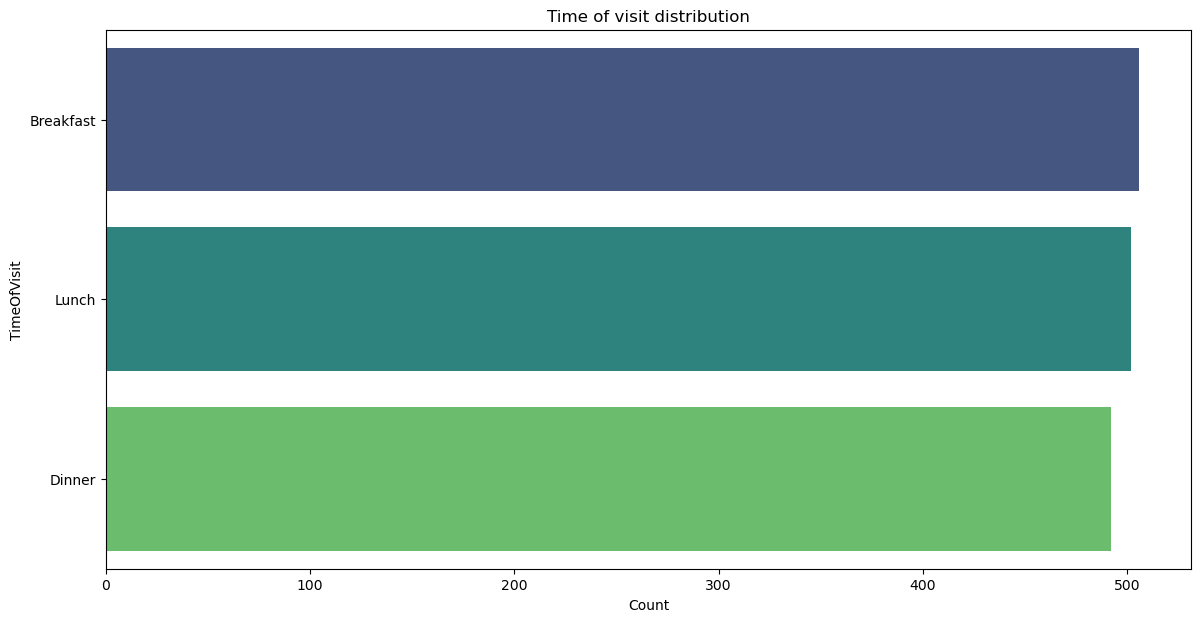

In [397]:
# visualize time of visit
df_by_time = df['TimeOfVisit'].value_counts().reset_index()
df_by_time.columns = ['TimeOfVisit', 'Count']
plt.figure(figsize=(14, 7))
sns.barplot(data=df_by_time, x='Count', y='TimeOfVisit', palette='viridis', orient='h')
plt.title('Time of visit distribution')
plt.show()

- The most frequent times for visits are during breakfast and lunch, with a slight decrease observed during dinner.

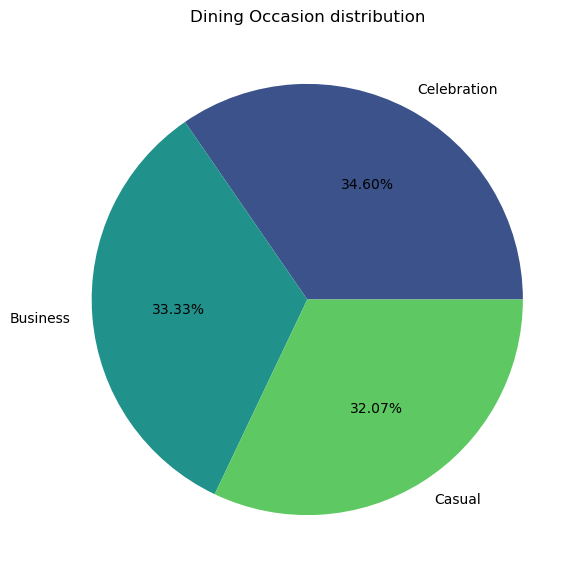

In [398]:
# visualize Dinning occasion
df_by_occ = df['DiningOccasion'].value_counts().reset_index()
df_by_occ.columns = ['DiningOccasion', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_occ['Count'], labels=df_by_occ['DiningOccasion'], autopct='%1.2f%%', colors=sns.color_palette('viridis', n_colors=3))
plt.title('Dining Occasion distribution')
plt.show()

- Celebration occasion ranks 1st with a percentage of 34,6%.
- Business occasion ranks 2nd with a percentage of 33,33%.
- Casual occasion ranks 3rd with a percentage of 32,07%.

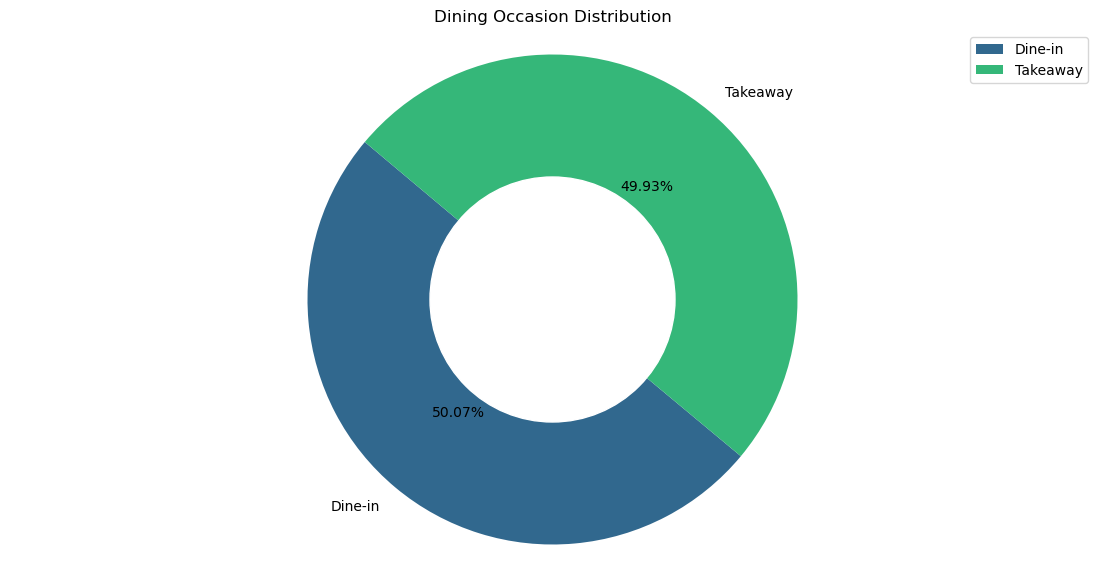

In [399]:
# # visualize meal type
df_by_meal = df['MealType'].value_counts().reset_index()
df_by_meal.columns = ['MealType', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_meal['Count'], labels=df_by_meal['MealType'], autopct='%1.2f%%', colors=sns.color_palette('viridis', n_colors=2), startangle=140)
inner_circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_artist(inner_circle)
plt.title('Dining Occasion Distribution')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

- 50.07% of people dine in the restaurant and 49.39% take away the food.

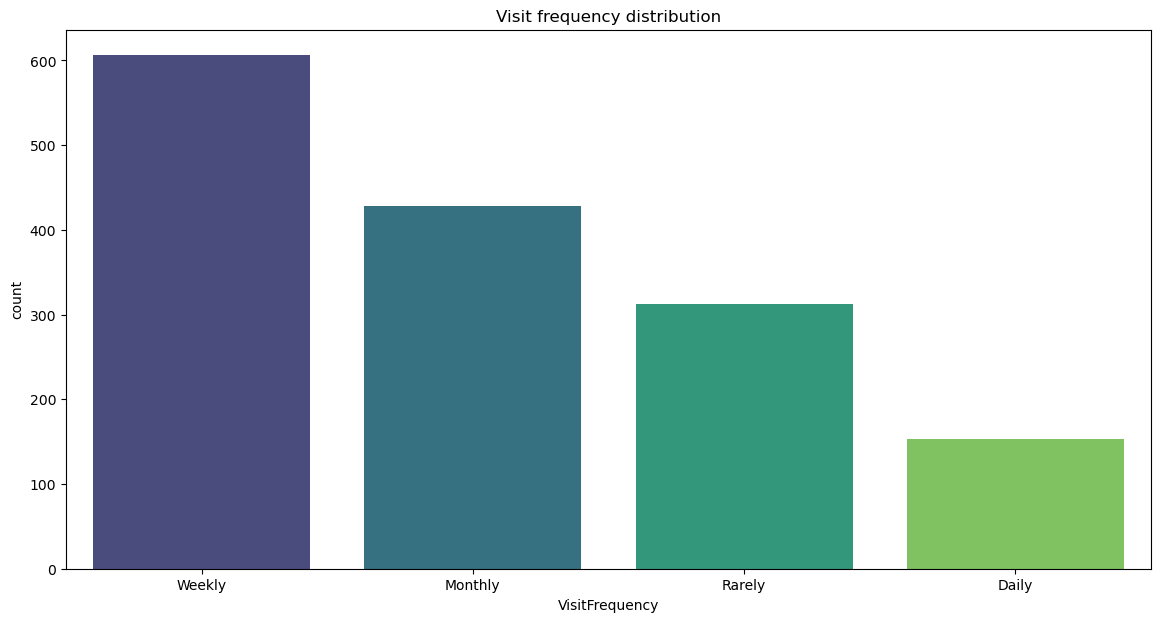

In [400]:
# visualize visit frequency
plt.figure(figsize=(14, 7))
sns.countplot(x=df['VisitFrequency'], palette='viridis', order=df['VisitFrequency'].value_counts().index)
plt.title('Visit frequency distribution')
plt.show()

- The highest number of visitors is weekly category.
- the next most frequent category is monthly visits.
- Rare visits to the restaurant are less frequent than monthly visits.
- Daily visits show the lowest frequency among all categories.

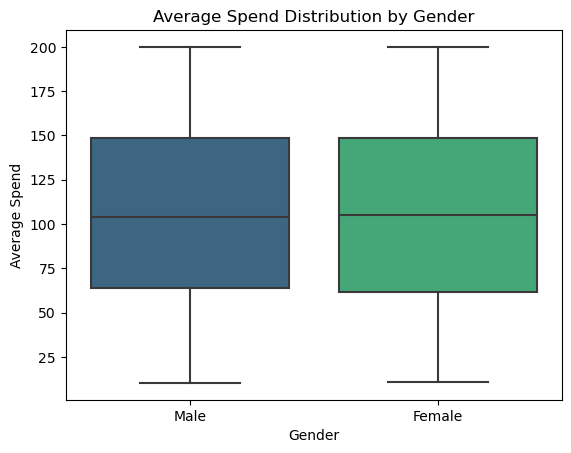

In [401]:
# visualize average spend by gender
sns.boxplot(data=df, x='Gender', y='AverageSpend', palette='viridis')
plt.title('Average Spend Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spend')
plt.show()

- The average spend for both genders approximately equal with an average of 110$.

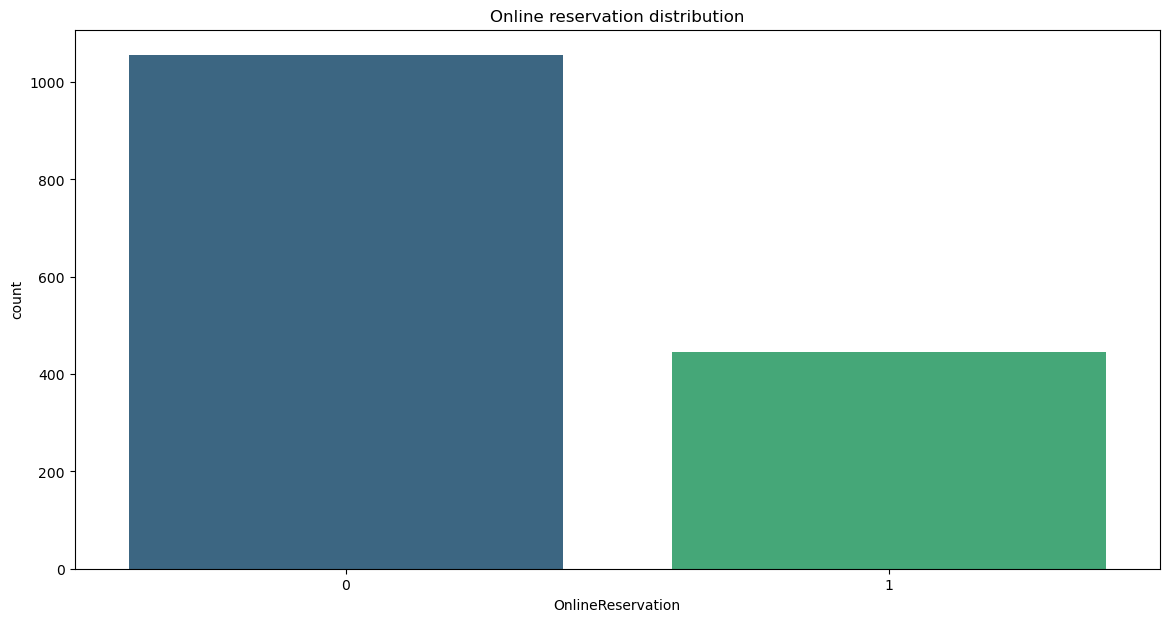

In [402]:
# visualize online reservation
plt.figure(figsize=(14, 7))
sns.countplot(x=df['OnlineReservation'], palette='viridis')
plt.title('Online reservation distribution')
plt.show()

- The number of people visiting the restaurant without a reservation is higher than those who make a reservation.

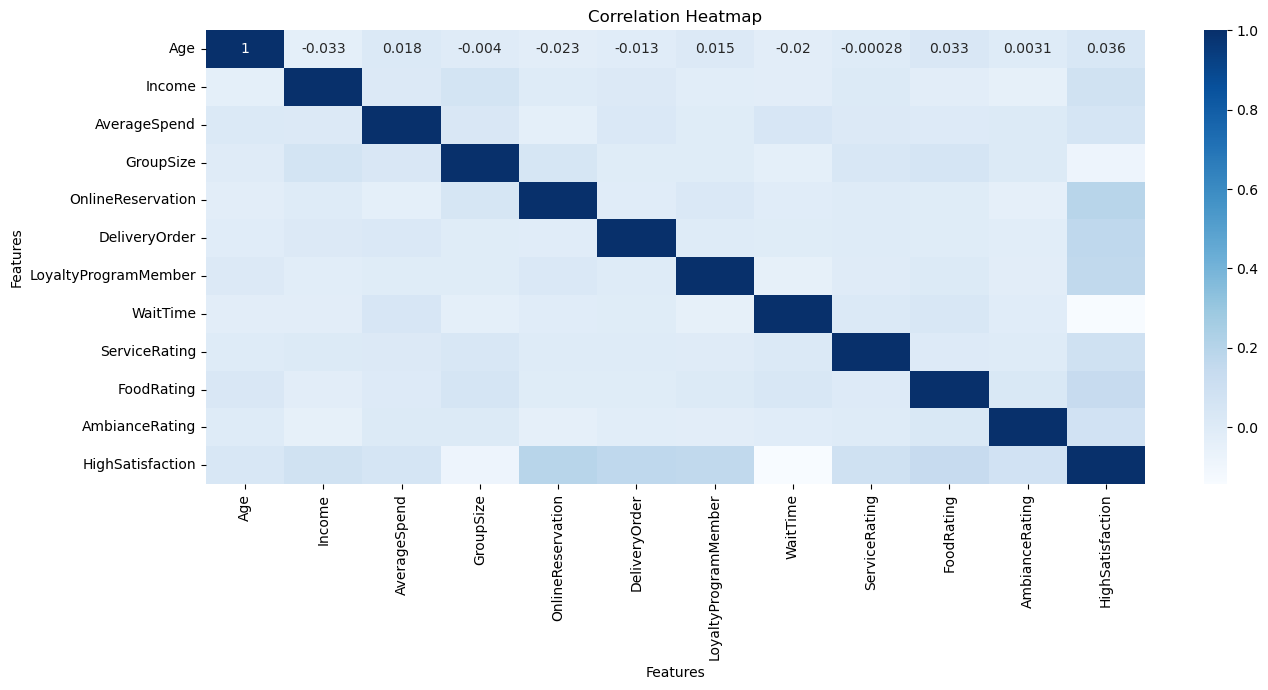

In [403]:
df_corr = df[['Age', 'Income', 'AverageSpend', 'GroupSize', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating', 'HighSatisfaction']]
correlation = df_corr.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [404]:
df_corr = df[['Age', 'Income', 'AverageSpend', 'GroupSize', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating', 'HighSatisfaction']]
correlation = df_corr.corr()
print(correlation)

                           Age    Income  AverageSpend  GroupSize  \
Age                   1.000000 -0.033288      0.017765  -0.003991   
Income               -0.033288  1.000000      0.014749   0.062892   
AverageSpend          0.017765  0.014749      1.000000   0.032754   
GroupSize            -0.003991  0.062892      0.032754   1.000000   
OnlineReservation    -0.023044  0.001922     -0.032448   0.044090   
DeliveryOrder        -0.013146  0.016125      0.022953  -0.008750   
LoyaltyProgramMember  0.014801 -0.015756     -0.007018  -0.009098   
WaitTime             -0.020497 -0.020136      0.040739  -0.032626   
ServiceRating        -0.000279  0.012369      0.015676   0.035472   
FoodRating            0.032616 -0.018925      0.007132   0.056249   
AmbianceRating        0.003066 -0.045090      0.009522   0.011622   
HighSatisfaction      0.035547  0.081905      0.052716  -0.084235   

                      OnlineReservation  DeliveryOrder  LoyaltyProgramMember  \
Age                   

- Online reservations, delivery orders, loyalty program membership, and shorter wait times are positively correlated with higher customer satisfaction.
- Income levels do not significantly correlate with average spending at the restaurant, indicating that spending behavior may not be strongly income-dependent.


In [420]:
numerical_features = ['Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']
categorical_features = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit','DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder','LoyaltyProgramMember']
#features
X = df.drop('HighSatisfaction', axis=1)
#target variable
y = df['HighSatisfaction']
#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scale numerical features
num_transform = Pipeline(steps=[
                          ('scale', StandardScaler())
])
# one hot encode categorical features
cat_transform = Pipeline(steps=[
                          ('onehot', OneHotEncoder())
])
# preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, numerical_features),
        ('cat', cat_transform, categorical_features)
    ]
)
# transform testing and training data
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

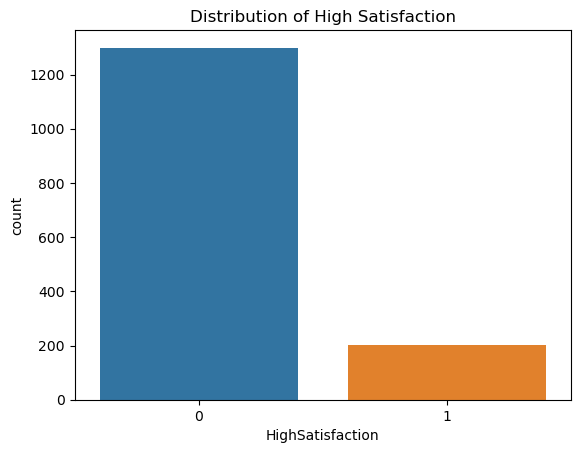

In [406]:
# Distribution of target variable
sns.countplot(x='HighSatisfaction', data=df)
plt.title('Distribution of High Satisfaction')
plt.show()

- The number of non high statisfied are higher than the satisfied and it could affect the accuracy of the model in predicting the satisfied .

In [429]:
# choose model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'knn': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}
results = {}
for name, model in models.items():
    model.fit(X_train_p, y_train)
    score = model.score(X_test_p, y_test)
    results[name] = score
print(results)
best_score = max(results.values())
print()
best_model = [name for name, score in results.items() if score == best_score]
print(f'best model {best_model} : {best_score}')

{'Logistic Regression': 0.91, 'Decision Tree': 0.77, 'Random Forest': 0.8766666666666667, 'Gradient Boosting': 0.8933333333333333, 'knn': 0.87, 'XGBoost': 0.8766666666666667}

best model ['Logistic Regression'] : 0.91


In [430]:
# Fine tuning logistic regression with Grid Search
model = LogisticRegression()
param_grid_l1 = {
    'penalty': ['l1'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
param_grid_l2 = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
param_grid_none = {
    'penalty': ['none'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
#grid_search_l1
grid_search_l1 = GridSearchCV(estimator=model, param_grid=param_grid_l1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l1.fit(X_train_p, y_train)
print('penalty l1:')
print(f'best parameters found: {grid_search_l1.best_params_}')
print(f'best cross validation score: {grid_search_l1.best_score_}')
print()
#grid_search_l2
grid_search_l2 = GridSearchCV(estimator=model, param_grid=param_grid_l2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l2.fit(X_train_p, y_train)
print('penalty l2:')
print(f'best parameters found: {grid_search_l2.best_params_}')
print(f'best cross validation score: {grid_search_l2.best_score_}')

#grid_search_none
grid_search_none = GridSearchCV(estimator=model, param_grid=param_grid_none, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_none.fit(X_train_p, y_train)
print()
print('penalty none:')
print(f'best parameters found: {grid_search_none.best_params_}')
print(f'best cross validation score: {grid_search_none.best_score_}')

penalty l1:
best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
best cross validation score: 0.8991666666666667

penalty l2:
best parameters found: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
best cross validation score: 0.9008333333333333

penalty none:
best parameters found: {'penalty': 'none', 'solver': 'newton-cg'}
best cross validation score: 0.8966666666666667


- we found that penalty l2 has best cross validation with parameters newton-cg as solver and 1 for C

In [431]:
# Define model with the best parameters
final_model = LogisticRegression(C=100, penalty='l2', solver='newton-cg', random_state=42)
#Fit the model
final_model.fit(X_train_p, y_train)
# Make predictions on the test dataset
y_pred = final_model.predict(X_test_p)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Test Set Accuracy: {100 * accuracy:.2f} %")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Test Set Accuracy: 91.33 %
Confusion Matrix:
[[252   7]
 [ 19  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       259
           1       0.76      0.54      0.63        41

    accuracy                           0.91       300
   macro avg       0.84      0.75      0.79       300
weighted avg       0.91      0.91      0.91       300



- The logistic regression model achieved an accuracy of 91% in predicting customer satisfaction. The confusion matrix and classification report indicate that the model performs well, especially in identifying non-satisfied customers.